### Classifiers

In [4]:
from data_processing import *

csv = 'features.csv'
d = data_clean(csv)

df_mm, num_scale = d.read_scale(csv)
X_train, X_test, y_train, y_test = d.split(csv)
X_train, X_test, y_train, y_test = d.index(csv)

X = num_scale

In [5]:
X.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', '('fixed acidity', 'citric acid')',
       '('fixed acidity', 'chlorides')',
       '('volatile acidity', 'residual sugar')', 'fixed acidity_citric acid',
       'fixed acidity_chlorides', 'volatile acidity_residual sugar',
       'citric acid_free sulfur dioxide', 'residual sugar_chlorides',
       'residual sugar_total sulfur dioxide', 'chlorides_density',
       'chlorides_sulphates', 'free sulfur dioxide_sulphates',
       'total sulfur dioxide_sulphates', 'density_pH'],
      dtype='object')

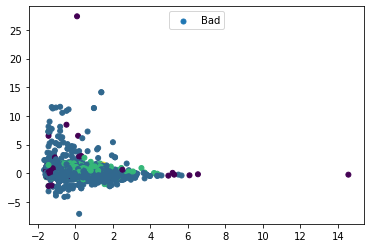

In [6]:
import matplotlib.pyplot as plt
labels = ['f_acidity','v_acidity']
plt.scatter(X.iloc[:, 5], X.iloc[:, 20], s=25, c=df_mm.cat)
plt.legend(labels=['Bad','Average', 'Good', 'Very good'], loc='upper center', ncol=4)

#### Random Forest

In [ ]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

### Decision Tree

### Multi-class with linear models

In [22]:
clf = LinearSVC(C=5, random_state = 67)
clf.fit(X_train, y_train)

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=5, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=67, tol=0.0001,
          verbose=0)

In [23]:
clf.score(X_test,y_test)

0.7807692307692308

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.model_selection import learning_curve
import numpy as np
from numpy.testing import assert_array_equal, assert_array_almost_equal
from sklearn.svm import SVC

In [ ]:
svm_lin = LinearSVC()
svm_model_lin = svm_lin.fit(X_train, y_train)
y_test_hat = svm_model_lin.predict(X_test)

In [ ]:
print(classification_report(y_test, y_test_hat))

In [ ]:
round(accuracy_score(y_test, y_test_hat), 3)

In [ ]:
svm_poly = SVC(kernel = 'poly')
svm_model_poly = svm_poly.fit(X_train, y_train)
y_test_hat = svm_model_poly.predict(X_test)

In [ ]:
print(classification_report(y_test, y_test_hat))

In [ ]:
round(accuracy_score(y_test, y_test_hat), 3)

KNN

In [24]:
# from sklearn.neighbors import KNeighborsClassifier
# knn_classifier = KNeighborsClassifier()
# knn_classifier.fit(X_train, y_train)
# knn_predictions = knn_classifier.predict(y_train)

In [44]:
import pandas as pd
import sklearn as sk
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import recall_score

LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial', class_weight='balanced').fit(X_train, y_train)
LR.predict(X_test)
round(LR.score(X_test,y_test), 4)


SVM = svm.SVC(decision_function_shape="ovr", class_weight='balanced').fit(X_train, y_train)
SVM.predict(X_test)
round(SVM.score(X_test, y_test), 4)



RF = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0, class_weight='balanced').fit(X_train, y_train)
y_rf = RF.predict(X_test)
round(RF.score(X_test, y_test), 4)
round(accuracy_score(y_test, y_rf), 3)

NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(150, 10), random_state=1).fit(X_train, y_train)
y_pred = NN.predict(X_test)
round(NN.score(X_test, y_test), 4)

### Metrics Valuation

from sklearn import metrics
from sklearn.metrics import classification_report, precision_score, recall_score, accuracy_score, f1_score, confusion_matrix

print('Accuracy:', round(accuracy_score(y_test, y_rf), 3))
print('Precision:', round(metrics.precision_score(y_test, y_rf, average='weighted'),3))
print('Recall:', round(recall_score(y_test,y_rf, average='weighted'),3))
print(classification_report(y_test, y_rf))